Conjugate gradien
$x_{n+1} = x_{n}-\alpha \nabla f(x_n)$

f = (x+5)^2

In [ ]:
import numpy as np

In [ ]:
cur_x = 3
rate = 1
precision  = 1e-9
maxiter = 100000
ctr = 0
df = lambda x: 2*(x+5)
prev_step_size = 1.0

In [ ]:
while prev_step_size > precision and ctr < maxiter:
  prev_x = cur_x
  cur_x = cur_x - rate * df(prev_x)
  prev_step_size = abs(prev_x - cur_x)
  rate = rate * 0.95
  ctr = ctr + 1



In [ ]:
print(cur_x, ctr)

-4.999999999952938 18


In [ ]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *


$f= -0.5 + (x+20)/30 + (y+10)/20 + sin(r)$

$r=\sqrt{x^2+y^2}$

In [ ]:
def f(x,y):
  r = sqrt(x**2 + y** 2)
  return -0.5 + (x+20)/30 + (y+10)/20 + sin(r)

In [ ]:
x = arange(-20,20,0.25)
y = arange(-20,20,0.25)
X, Y = meshgrid(x,y)
R = sqrt(X**2 + Y**2)
Z = -0.5 + (X+20)/30 + (Y+10)/20 + sin(R)

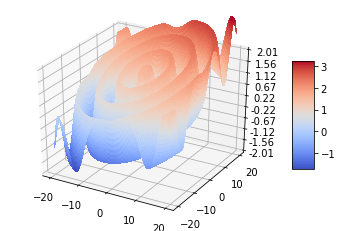

In [ ]:
fig = figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show()    

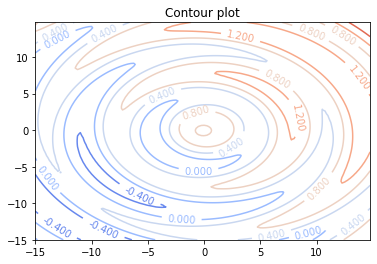

In [ ]:
x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)

figure(1)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
clabel(CS, inline=1, fontsize=10)
title('Contour plot')

show()

$\frac{\partial f}{\partial x} = 1/30 + \cdot cos(r) \frac{\partial r}{\partial x}$

$\frac{\partial f}{\partial x} = 1/20 + cos(r)\frac{\partial r}{\partial y}$

$\frac{\partial r}{\partial x} = 0.5\cdot (1/\sqrt{(x^2 + y^2)})(2x)$

$\frac{\partial r}{\partial y} = 0.5\cdot ( 1/\sqrt{(x^2 + y^2)})(2y)$

$f= -0.5 + (x+20)/30 + (y+10)/20 + sin(r)$

In [ ]:
def drdx(x,y,r):
  return 0.5 * (x**2 + y**2)**(-.5)*(2*x)

In [ ]:
def drdy(x,y,r):
  return 0.5 * (x**2 + y**2)**(-.5)*(2*y)

In [ ]:
def dfdx(x,y):
  r = sqrt(x**2 + y**2)
  return 1/30 + cos(r)  * drdx(x,y,r)

In [ ]:
def dfdy(x,y):
  r = sqrt(x**2 + y**2)
  return 1/20 + cos(r)  * drdy(x,y,r)

In [ ]:
def gradF(x,y):
  return array([dfdx(x,y), dfdy(x,y)])

In [ ]:
x = 0
y = 5
h = 0.0000001
(f(x+h,y) - f(x,y))/h

0.0333333360913457

In [ ]:
dfdx(x,y)

0.03333333333333333

In [ ]:
(f(x,y+h) - f(x,y))/h

0.33366223450848054

In [ ]:
dfdy(x,y)

0.33366218546322624

In [ ]:
gradF(x,y)

array([0.03333333, 0.33366219])

In [ ]:
def grad_desc(f, gradF, iniT, alpha):
  eps = 1e-5
  prevT = iniT -20*eps
  t = iniT.copy()

  maxIt = 10000
  ctr = 0

  while norm( t- prevT) > eps and ctr < maxIt:
    ctr = ctr + 1
    prevT = t.copy()
    t = t - alpha * gradF(t[0], t[1])
    alpha = alpha * 0.9
  return t



In [ ]:
x = 10
y = 8
alpha = 0.01
grad_desc(f, gradF, array([x,y]), alpha)

array([7.5292897, 8.0131368])

# TASK 
find min value of a function given radius of search

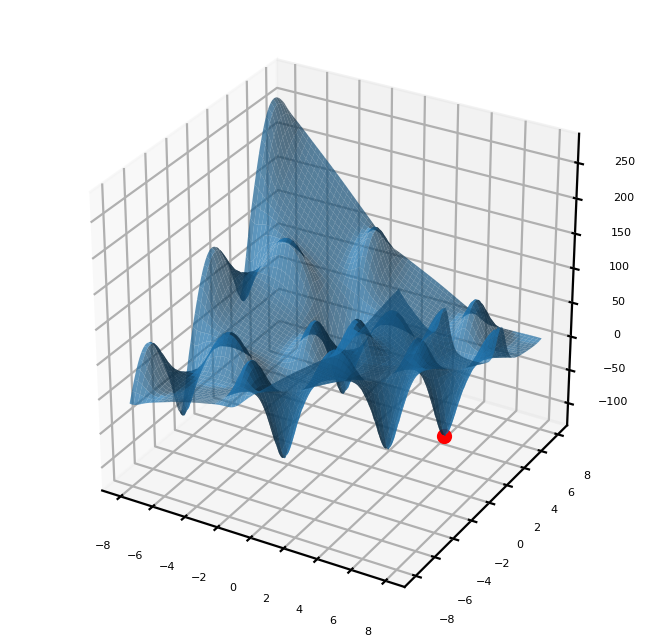

In [ ]:
import numpy as np
import matplotlib.pyplot as plot


radius = 8                                  # search radius
global_epsilon = 0.000000001                # argument increment for derivative
centre = (global_epsilon, global_epsilon)   # circle centre
arr_shape = 100                             # number of points processed / 360
step = radius / arr_shape                   # step between two points


def differentiable_function(x, y):
    return np.sin(x) * np.exp((1 - np.cos(y)) ** 2) + \
           np.cos(y) * np.exp((1 - np.sin(x)) ** 2) + (x - y) ** 2


def rotate_vector(length, a):
    return length * np.cos(a), length * np.sin(a)


def derivative_x(epsilon, arg):
    return (differentiable_function(global_epsilon + epsilon, arg) -
            differentiable_function(epsilon, arg)) / global_epsilon


def derivative_y(epsilon, arg):
    return (differentiable_function(arg, epsilon + global_epsilon) -
            differentiable_function(arg, epsilon)) / global_epsilon


def calculate_flip_points():
    flip_points = np.array([0, 0])
    points = np.zeros((360, arr_shape), dtype=bool)
    cx, cy = centre

    for i in range(arr_shape):
        for alpha in range(360):
            x, y = rotate_vector(step, alpha)
            x = x * i + cx
            y = y * i + cy
            points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0
            if not points[alpha][i - 1] and points[alpha][i]:
                flip_points = np.vstack((flip_points, np.array([alpha, i - 1])))

    return flip_points


def pick_estimates(positions):
    vx, vy = rotate_vector(step, positions[1][0])
    cx, cy = centre
    best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]

    for index in range(2, len(positions)):
        vx, vy = rotate_vector(step, positions[index][0])
        x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    for index in range(360):
        vx, vy = rotate_vector(step, index)
        x, y = cx + vx * (arr_shape - 1), cy + vy * (arr_shape - 1)
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    return best_x, best_y


def gradient_descent(best_estimates, is_x):
    derivative = derivative_x if is_x else derivative_y
    best_x, best_y = best_estimates
    descent_step = step
    value = derivative(best_y, best_x)

    while abs(value) > global_epsilon:
        descent_step *= 0.95
        best_y = best_y - descent_step \
            if derivative(best_y, best_x) > 0 else best_y + descent_step
        value = derivative(best_y, best_x)

    return best_y, best_x


def find_minimum():
    return gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)


def get_grid(grid_step):
    samples = np.arange(-radius, radius, grid_step)
    x, y = np.meshgrid(samples, samples)
    return x, y, differentiable_function(x, y)


def draw_chart(point, grid):
    point_x, point_y, point_z = point
    grid_x, grid_y, grid_z = grid
    plot.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4
    })
    ax = plot.figure().add_subplot(111, projection='3d')
    ax.scatter(point_x, point_y, point_z, color='red')
    ax.plot_surface(grid_x, grid_y, grid_z, rstride=5, cstride=5, alpha=0.7)
    plot.show()


if __name__ == '__main__':
    min_x, min_y = find_minimum()
    minimum = (min_x, min_y, differentiable_function(min_x, min_y))
    draw_chart(minimum, get_grid(0.05))